# RAPPORT ML 2025 

## KMEANS

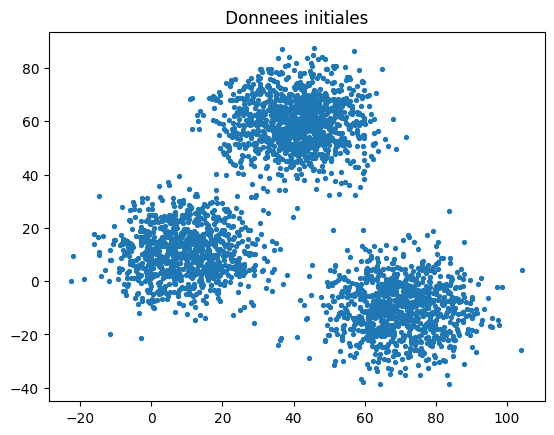

In [3]:
import numpy as np
import matplotlib . pyplot as plt
from scipy . io import arff
import time
from sklearn import cluster

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

path = "./artificial/"
databrut = arff.loadarff(open(path + "xclara.arff",'r'))
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in databrut [ 0 ] ]

f0 = np.array(datanp)[:,0]
f1 = np.array(datanp)[:,1]

plt.scatter( f0 , f1 , s = 8 )
plt.title( " Donnees initiales " )
plt.show()

Appel KMeans pour plusieurs valeurs de k, sans soucis
nb clusters =  2 , sil_score =  0.6305972114000131 , davis_score =  0.541801330190927 , cal_score =  2386.4259543247335  , nb iter =  4  ,runtime =  2.57  ms 
nb clusters =  3 , sil_score =  0.472719979659545 , davis_score =  0.9914217631664761 , cal_score =  1542.5392394412502  , nb iter =  7  ,runtime =  0.0  ms 
nb clusters =  4 , sil_score =  0.36045675988234493 , davis_score =  1.1898741194803646 , cal_score =  1431.6380791847816  , nb iter =  9  ,runtime =  11.51  ms 
nb clusters =  5 , sil_score =  0.37039877884609224 , davis_score =  1.008908507153923 , cal_score =  1394.8207444102477  , nb iter =  15  ,runtime =  1.93  ms 
nb clusters =  6 , sil_score =  0.3762673101817998 , davis_score =  0.8686077331433188 , cal_score =  1475.4962962907111  , nb iter =  29  ,runtime =  0.0  ms 
nb clusters =  7 , sil_score =  0.4008984869184512 , davis_score =  0.8103927134856341 , cal_score =  1558.628590600848  , nb iter =  19  ,runtime

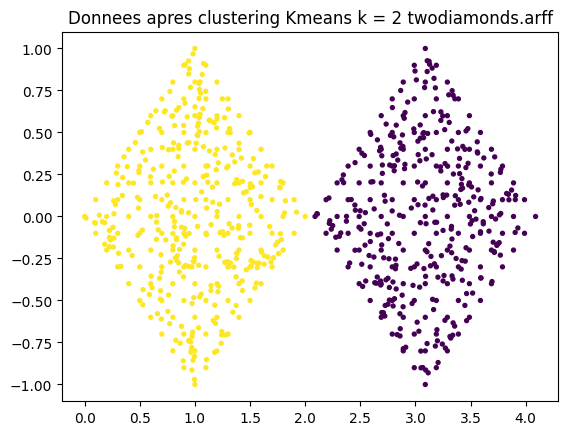

nb clusters =  2 , sil_score =  0.47418143741570656 , davis_score =  0.780883125430336 , cal_score =  515.5041617551458  , nb iter =  16  ,runtime =  9.01  ms 
nb clusters =  3 , sil_score =  0.6171807766046922 , davis_score =  0.5159747512886118 , cal_score =  1204.3195506314394  , nb iter =  4  ,runtime =  6.27  ms 
nb clusters =  4 , sil_score =  0.5264278653185316 , davis_score =  0.8198979958875763 , cal_score =  1035.7597614577487  , nb iter =  10  ,runtime =  16.77  ms 
nb clusters =  5 , sil_score =  0.4723660522520034 , davis_score =  0.73009232415061 , cal_score =  865.3483012917708  , nb iter =  5  ,runtime =  2.48  ms 
nb clusters =  6 , sil_score =  0.4031863246933564 , davis_score =  0.7109368568561542 , cal_score =  1048.9231193724822  , nb iter =  13  ,runtime =  0.0  ms 
nb clusters =  7 , sil_score =  0.3923248535721456 , davis_score =  0.8855651168451056 , cal_score =  1022.9275510111968  , nb iter =  11  ,runtime =  4.22  ms 
nb clusters =  8 , sil_score =  0.411217

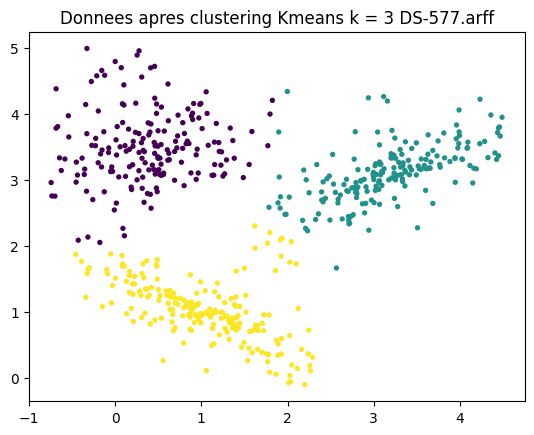

nb clusters =  2 , sil_score =  0.42462132277347137 , davis_score =  1.0755007615277405 , cal_score =  765.8994158732044  , nb iter =  3  ,runtime =  8.48  ms 
nb clusters =  3 , sil_score =  0.4417504612934069 , davis_score =  0.7460624306089857 , cal_score =  887.076677697064  , nb iter =  5  ,runtime =  0.0  ms 
nb clusters =  4 , sil_score =  0.5973265109573306 , davis_score =  0.5168282516187686 , cal_score =  2075.696525957616  , nb iter =  4  ,runtime =  5.25  ms 
nb clusters =  5 , sil_score =  0.5166185907950946 , davis_score =  0.7558093885746647 , cal_score =  1760.2406169294045  , nb iter =  6  ,runtime =  0.0  ms 
nb clusters =  6 , sil_score =  0.44247910739278723 , davis_score =  0.9530380816191478 , cal_score =  1564.6873285448394  , nb iter =  9  ,runtime =  13.74  ms 
nb clusters =  7 , sil_score =  0.37055779993737736 , davis_score =  1.0604736668644243 , cal_score =  1482.2117252132998  , nb iter =  9  ,runtime =  0.0  ms 
nb clusters =  8 , sil_score =  0.376112484

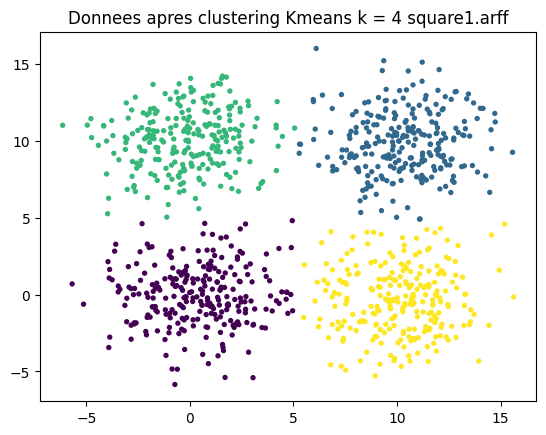

In [4]:
print("Appel KMeans pour plusieurs valeurs de k, sans soucis")

names = ["twodiamonds.arff", "DS-577.arff", "square1.arff"]
best_ks = []

for name in names:

    path = "./artificial/"
    databrut = arff.loadarff(open(path + name,'r', encoding='utf-8'))
    datanp = [[x[0], x[1]] for x in databrut [0]]

    f0 = np.array(datanp)[:,0]
    f1 = np.array(datanp)[:,1]  

    best_score = 0

    for k in range(2, 9):

        tps1 = time.time()
        model = cluster.KMeans(n_clusters=k, init = 'k-means++')
        model.fit(datanp)
        tps2 = time.time()

        labels = model.labels_
        iteration = model.n_iter_
        
        sil_score = silhouette_score(datanp, model.fit_predict(datanp))
        davis_score = davies_bouldin_score(datanp, model.fit_predict(datanp))
        cal_score = calinski_harabasz_score(datanp, model.fit_predict(datanp))

        if sil_score > best_score:
            best_score = sil_score
            best_k = k
        print ("nb clusters = " , k , ", sil_score = ", sil_score, ", davis_score = ", davis_score, ", cal_score = ", cal_score, " , nb iter = " , iteration , " ,runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " ) 

    best_ks.append(best_k)
    model = cluster.KMeans(n_clusters=best_k, init='k-means++')
    model.fit(datanp)
    labels = model.labels_
    plt.scatter ( f0 , f1 , c=labels , s = 8 )
    plt.title ( "Donnees apres clustering Kmeans k = " + str(best_k) + " " + name)
    plt.show ()

Appel KMeans pour plusieurs valeurs de k, avec soucis
nb clusters =  2 , score =  0.3179726736626111  , nb iter =  6  ,runtime =  2.44  ms 
nb clusters =  3 , score =  0.3427806028689384  , nb iter =  8  ,runtime =  12.6  ms 
nb clusters =  4 , score =  0.324024245144833  , nb iter =  10  ,runtime =  1.03  ms 
nb clusters =  5 , score =  0.34255631689806104  , nb iter =  11  ,runtime =  9.51  ms 
nb clusters =  6 , score =  0.32896938340753923  , nb iter =  9  ,runtime =  0.0  ms 
nb clusters =  7 , score =  0.32543770790527676  , nb iter =  11  ,runtime =  0.0  ms 
nb clusters =  8 , score =  0.34601059693419667  , nb iter =  17  ,runtime =  0.0  ms 


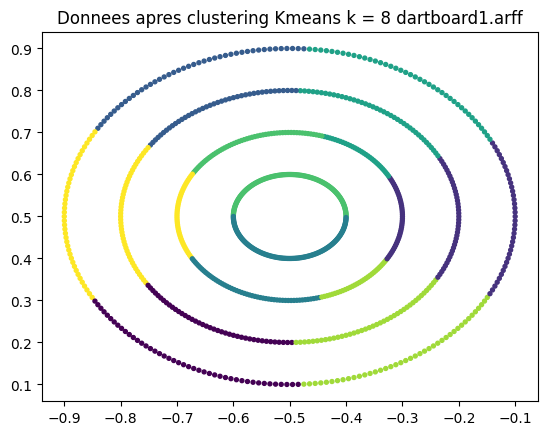

nb clusters =  2 , score =  0.42937113058111165  , nb iter =  7  ,runtime =  0.0  ms 
nb clusters =  3 , score =  0.34955439482878803  , nb iter =  9  ,runtime =  15.01  ms 
nb clusters =  4 , score =  0.3788049946627101  , nb iter =  12  ,runtime =  0.0  ms 
nb clusters =  5 , score =  0.43993955756052244  , nb iter =  12  ,runtime =  4.01  ms 
nb clusters =  6 , score =  0.46811736678495575  , nb iter =  7  ,runtime =  0.0  ms 
nb clusters =  7 , score =  0.4853190023470902  , nb iter =  16  ,runtime =  0.0  ms 
nb clusters =  8 , score =  0.47938971705046945  , nb iter =  13  ,runtime =  15.62  ms 


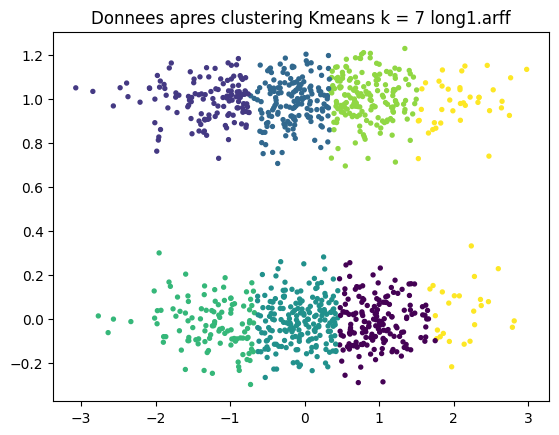

In [5]:
print("Appel KMeans pour plusieurs valeurs de k, avec soucis")

names = ["dartboard1.arff", "long1.arff"]
best_ks = []

for name in names:

    path = "./artificial/"
    databrut = arff.loadarff(open(path + name,'r', encoding='utf-8'))
    datanp = [[x[0], x[1]] for x in databrut [0]]

    f0 = np.array(datanp)[:,0]
    f1 = np.array(datanp)[:,1]  

    best_score = 0

    for k in range(2, 9):

        tps1 = time.time()
        model = cluster.KMeans(n_clusters=k, init = 'k-means++')
        model.fit(datanp)
        tps2 = time.time()

        labels = model.labels_
        iteration = model.n_iter_
        
        score = silhouette_score(datanp, model.fit_predict(datanp))

        if score > best_score:
            best_score = score
            best_k = k
        print ("nb clusters = " , k , ", score = ", score, " , nb iter = " , iteration , " ,runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " ) 

    best_ks.append(best_k)
    model = cluster.KMeans(n_clusters=best_k, init='k-means++')
    model.fit(datanp)
    labels = model.labels_
    plt.scatter ( f0 , f1 , c=labels , s = 8 )
    plt.title ( "Donnees apres clustering Kmeans k = " + str(best_k) + " " + name)
    plt.show ()






## AGGLOMERATIVE

 Dendrogramme 'single' donnees initiales 


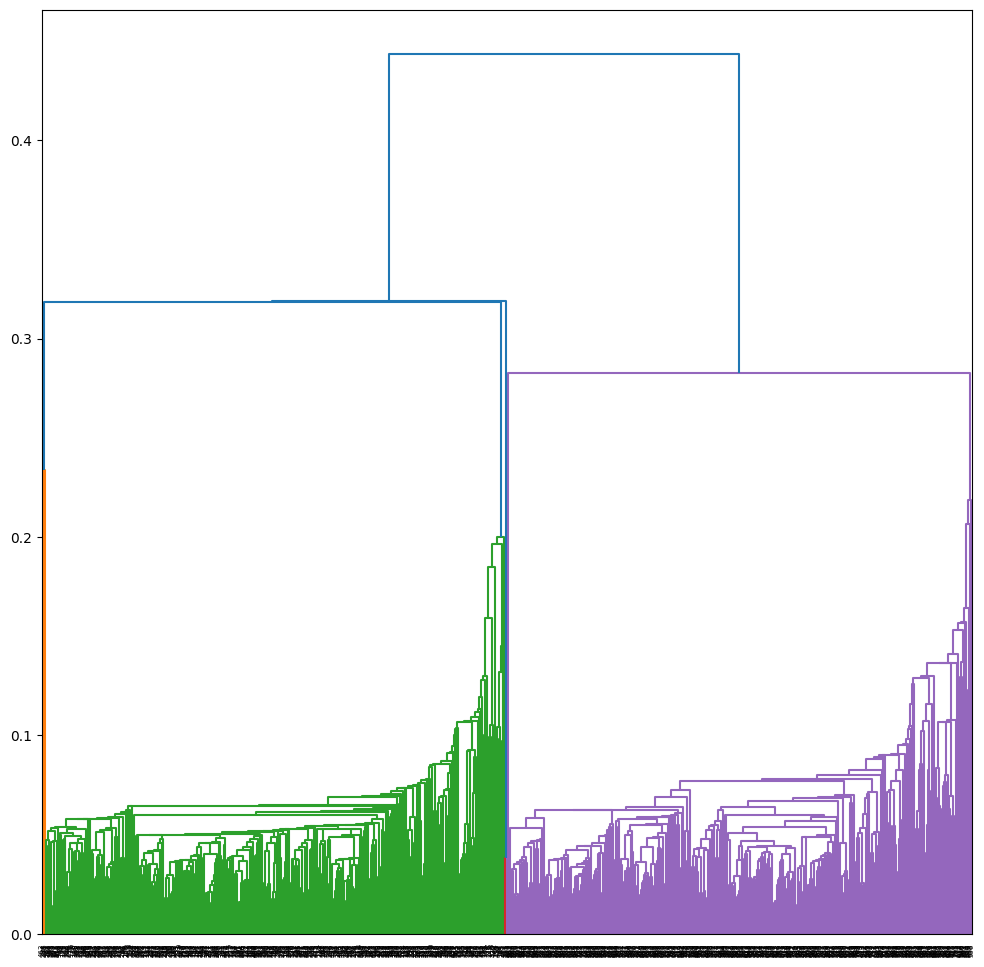

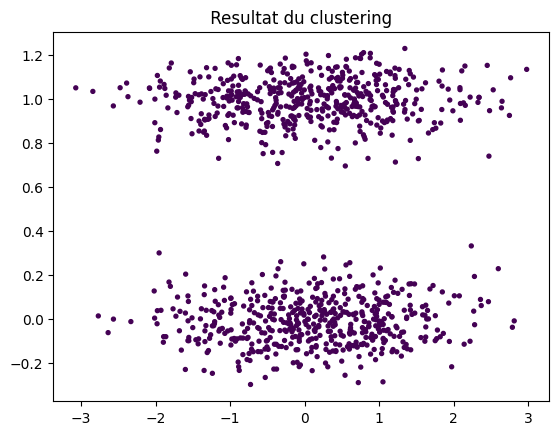

 nb clusters =  1  , nb feuilles =  1000  runtime =  16.3  ms 


In [6]:
import scipy . cluster . hierarchy as shc

print ( " Dendrogramme 'single' donnees initiales " )
linked_mat = shc.linkage ( datanp , 'single')
plt.figure(figsize=(12,12))
shc.dendrogram(linked_mat, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.show()

# set distance_threshold ( 0 ensures we compute the full tree )
tps1 = time . time ()
model = cluster.AgglomerativeClustering(distance_threshold=10, linkage='single', n_clusters=None)
model = model.fit(datanp)
tps2 = time.time()
labels = model.labels_
k = model.n_clusters_
leaves = model.n_leaves_

# Affichage clustering
plt.scatter( f0 , f1 , c = labels , s = 8 )
plt.title(" Resultat du clustering ")
plt.show()
print(" nb clusters = ", k, " , nb feuilles = ", leaves, " runtime = ", round((tps2 - tps1)*1000, 2), " ms ")

# set the number of clusters
k = 4
tps1 = time.time()
model = cluster.AgglomerativeClustering (linkage='single', n_clusters=k)
model = model.fit(datanp)
tps2 = time.time()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_